In [2]:
'''
Testing the theorized approach if using sentiment analysis to force sentneces into 3 categories 
then uselogisitc regression to decidebetween 1 vs 2 stars and then 4 vs 5 stars
'''

from imports import *
from data_loader import *

stemmed = 'star_reviews.db'
unstemmed = 'star_reviews_unstemmed.db'

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/eitan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
# Comparison of mapping traditional Sentiment analysis polarity of (1-3) vs (1-5)

def map_polarity_3(polarity_score):
    if polarity_score > 0.3333:
        return 3
    elif polarity_score > -0.3333:
        return 2
    else:
        return 1
    
def map_polarity_5(polarity_score):
    '''
    Given a polarity score, return value from 1 to 5 inclusive.
    Input: (Float) polarity score provided by sentiment analysis dictionary
    Output: (Int) Polarity score, remapped on a scale of 1 to 5
    '''
    if polarity_score > 0.6:
        return 5  # Strongly positive sentiment
    elif polarity_score > 0.2:
        return 4  # Positive sentiment
    elif polarity_score > -0.2:
        return 3  # Neutral sentiment
    elif polarity_score > -0.6:
        return 2  # Negative sentiment
    else:
        return 1  # Strongly negative sentiment

In [4]:
# Retrieve data (unvectorized) 

# NOTE: Current query limit of data set
X, Y = sql_query_raw(db_file=stemmed, query_limit= 100000)
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.2, random_state=42)
stemmed_data = (trainX, testX, trainY, testY)

X, Y = sql_query_raw(db_file= unstemmed, query_limit= 100000)
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.2, random_state=42)
unstemmed_data = (trainX, testX, trainY, testY)


In [ ]:
def VADER(packed_data):
    '''
    Runs polarity score calculator on yelp reviews
    I: Tuple of training/test split for Vader SA
    O: Accuracy scores of VADER
    '''
    trainX, testX, trainY, testY = packed_data

    # Function to calculate sentiment using TextBlob
    def analyze_sentiment(text):
        # Initialize the SentimentIntensityAnalyzer
        sid_obj = SIA()
        VADER_dict = sid_obj.polarity_scores(text)  # Polarity score between -1 (negative) and +1 (positive)
        polarity = VADER_dict['compound']
        # Classify the sentiment on a scale of 1 to 5
        remapped_polarity = map_polarity_5(polarity_score=polarity)
        
        return remapped_polarity
    
    # Retrieve training predictions
    train_pred = [analyze_sentiment(text) for text in trainX]
    test_pred = [analyze_sentiment(text) for text in testX]
    
    # Return accuracy of the sentiment classification
    train_accuracy = accuracy_score(trainY, train_pred)
    test_accuracy = accuracy_score(testY, test_pred)
    
    print(f'Training accuracy: {train_accuracy * 100:.2f}%')
    print(f'Testing accuracy: {test_accuracy * 100:.2f}%')
    return [train_accuracy, test_accuracy]

def textblob(packed_data):
    '''
    Runs polarity score calculator on yelp reviews
    I: Tuple of training/test split for Textblob SA
    O: Accuracy scores of textblob
    '''
    trainX, testX, trainY, testY = packed_data

    # Function to calculate sentiment using TextBlob
    def analyze_sentiment(text):
        blob = TextBlob(text)
        polarity = blob.sentiment.polarity  # Polarity score between -1 (negative) and +1 (positive)
        
        # Classify the sentiment on a scale of 1 to 5
        remapped_polarity = map_polarity_5(polarity_score=polarity)
        
        return remapped_polarity
    
    # Retrieve training predictions
    train_pred = [analyze_sentiment(text) for text in trainX]
    test_pred = [analyze_sentiment(text) for text in testX]
    
    # Return accuracy of the sentiment classification
    train_accuracy = accuracy_score(trainY, train_pred)
    test_accuracy = accuracy_score(testY, test_pred)
    
    print(f'Training accuracy: {train_accuracy * 100:.2f}%')
    print(f'Testing accuracy: {test_accuracy * 100:.2f}%')

    return [train_accuracy, test_accuracy]


In [6]:
# Get accuracies for each

# Stemmed, vader:
vader_stem = VADER(stemmed_data)

vader_unstem = VADER(unstemmed_data)

tb_stem = textblob(stemmed_data)

tb_unstem = textblob(unstemmed_data)

Training accuracy: 45.55%
Testing accuracy: 44.81%
Training accuracy: 47.23%
Testing accuracy: 46.99%
Training accuracy: 28.91%
Testing accuracy: 28.52%
Training accuracy: 28.80%
Testing accuracy: 28.85%


Veder stemmed: 
Training accuracy: 45.55%
Testing accuracy: 44.81%

Vader unstemmed: 
Training accuracy: 47.23%
Testing accuracy: 46.99%

Textblob stemmed: 
Training accuracy: 28.91%
Testing accuracy: 28.52%

Textblob unstemmed:
Training accuracy: 28.80%
Testing accuracy: 28.85%

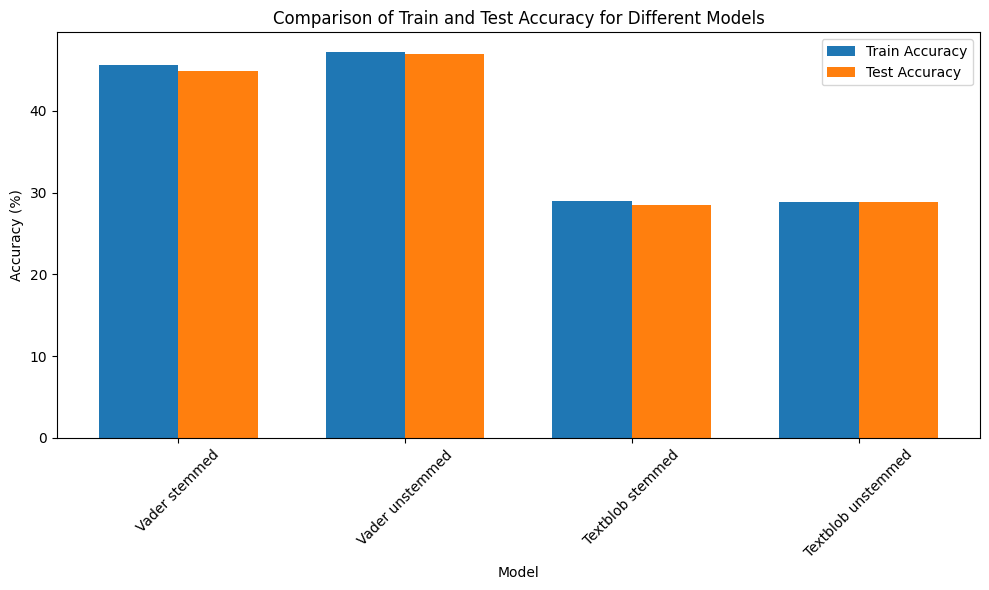

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Train and Test accuracy results
train_accuracy = {
    "Vader stemmed": 45.55,
    "Vader unstemmed": 47.23,
    "Textblob stemmed": 28.91,
    "Textblob unstemmed": 28.80
}

test_accuracy = {
    "Vader stemmed": 44.81,
    "Vader unstemmed": 46.99,
    "Textblob stemmed": 28.52,
    "Textblob unstemmed": 28.85
}

# Extract scores
model_names = list(train_accuracy.keys())
train_scores = list(train_accuracy.values())
test_scores = list(test_accuracy.values())

x = np.arange(len(model_names))
width = 0.35
# Create bar plots
fig, ax = plt.subplots(figsize=(10, 6))

bar1 = ax.bar(x - width/2, train_scores, width, label='Train Accuracy')
bar2 = ax.bar(x + width/2, test_scores, width, label='Test Accuracy')

# Labeling the graph
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy (%)')
ax.set_title('Comparison of Train and Test Accuracy for Different Models')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
